# Purificação de Estados (06)

In [1]:
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
from qiskit.tools.monitor import job_monitor
import math;from qiskit.tools.visualization import plot_histogram
import numpy as np;from qiskit.tools.monitor import backend_overview, backend_monitor
import matplotlib.pyplot as plt
from qiskit.quantum_info import Statevector
import qiskit
from qiskit import *
qiskit.IBMQ.save_account('7cc830e0cb005ce6de9caf9c402a1992c5d38d25af4237c19e72a4c58ce204481eb7a0d08b9929e5b5d3028f3146c38d2da8f2eb8db8f6f8b02a97eeb8fbc6de', 
                  overwrite = True)
qiskit.IBMQ.load_account()
provider = qiskit.IBMQ.get_provider(hub='ibm-q', group='open', project='main')
simulator = Aer.get_backend('qasm_simulator')
device = provider.get_backend('ibmq_lima')#ibmq_belem')
nshots = 8192

/home/v/anaconda3/lib/python3.8/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.6) or chardet (4.0.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
/home/v/anaconda3/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [5]:
qr = qiskit.QuantumRegister(2); qc = qiskit.QuantumCircuit(qr)
qc.cx(0,1)
qstc = state_tomography_circuits(qc, [qr[0],qr[1]]); # circuito para TEQ
job = qiskit.execute(qstc, qiskit.Aer.get_backend('qasm_simulator'), shots=nshots) # executa no simulador
qstf = StateTomographyFitter(job.result(), qstc) # ajusta os dados
rhoBA = qstf.fit(method='lstsq'); rhoA = pTraceL_num(2, 2, rhoBA); rhoA

array([[ 9.98644952e-01+0.j        , -6.90555152e-04+0.00314755j],
       [-6.90555152e-04-0.00314755j,  1.35504806e-03+0.j        ]])

In [8]:
qr = qiskit.QuantumRegister(2); qc = qiskit.QuantumCircuit(qr)
qc.h(0)
qc.cx(0,1)
qc.h(0)
qstc = state_tomography_circuits(qc, [qr[0],qr[1]]); # circuito para TEQ
job = qiskit.execute(qstc, qiskit.Aer.get_backend('qasm_simulator'), shots=nshots) # executa no simulador
qstf = StateTomographyFitter(job.result(), qstc) # ajusta os dados
rhoBA = qstf.fit(method='lstsq'); rhoA = pTraceL_num(2, 2, rhoBA); rhoA

array([[0.50696611+0.j        , 0.00352768-0.00242148j],
       [0.00352768+0.00242148j, 0.49303389+0.j        ]])

In [4]:
def pTraceL_num(dl, dr, rhoLR):
    # Returns the left partial trace over the 'left' subsystem of rhoLR
    rhoR = np.zeros((dr, dr), dtype=complex)
    for j in range(0, dr):
        for k in range(j, dr):
            for l in range(0, dl):
                rhoR[j,k] += rhoLR[l*dr+j,l*dr+k]
            if j != k:
                rhoR[k,j] = np.conj(rhoR[j,k])
    return rhoR

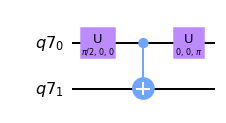

In [24]:
rp = 1/2; vth = 2*math.acos(sqrt(rp)); th = 0*math.pi/4; ph = 0*math.pi/3
qr = qiskit.QuantumRegister(2); qc = qiskit.QuantumCircuit(qr)
qc.u(vth,0,0,qr[0]); qc.cx(qr[0],qr[1]); qc.u(th,ph,math.pi,qr[0]);
qc.draw(output='mpl')

In [21]:
qstc = state_tomography_circuits(qc, [qr[0],qr[1]]); # circuito para TEQ
job = qiskit.execute(qstc, qiskit.Aer.get_backend('qasm_simulator'), shots=nshots) # executa no simulador
qstf = StateTomographyFitter(job.result(), qstc) # ajusta os dados
rhoBA = qstf.fit(method='lstsq'); rhoA = pTraceL_num(2, 2, rhoBA); rhoA

array([[ 0.50042018+0.j        , -0.00093005-0.00194823j],
       [-0.00093005+0.00194823j,  0.49957982+0.j        ]])

In [22]:
qstc = state_tomography_circuits(qc, [qr[0],qr[1]]); # circuito para TEQ
job = qiskit.execute(qstc, backend = device, shots = nshots)
print(job.job_id()); job_monitor(job)

618ab8bef6ecb333b18cfb74
Job Status: job has successfully run


In [23]:
qstf = StateTomographyFitter(job.result(), qstc) # ajusta os dados
rhoBA = qstf.fit(method='lstsq'); # extrai o operador densidade
rhoA = pTraceL_num(2, 2, rhoBA); rhoA

array([[0.56424933+0.j        , 0.01241791+0.00736485j],
       [0.01241791-0.00736485j, 0.43575067+0.j        ]])